# Edited Nearest Neighbours

Thuật toán hoạt động như sau:

1) Huấn luyện một thuật toán kNN trên dữ liệu (người dùng xác định số lượng neighbour, thường là 3)

2) Tìm 3 NN cho mỗi quan sất (hoặc số lượng neighbour do người dùng xác định ở bước 1)

3) Tìm nhãn của từng neighbour (là mục tiêu trong tập dữ liệu)

**2 chiến lược undersampling:**

4) **mode**: nếu **phần lớn neighbour** có nhãn tương tự quan sát thì chúng ta giữ lại quan sát

5) **all**: nếu **tất cả các neighbour** có nhãn tương tự quan sát thì chúng ta giữ lại quan sát

6) Hoặc chúng ta loại quan sát khỏi tập dữ liệu - **undersample** 

7) Tập dữ liệu undersampled là tập dữ liệu sau khi đã loại các quan sát


===

Thuật toán loại các quan sát mà lớp của các neighbour khác nhau. Chúng thường là các quan sát khó phân loại và/hoặc gây ra nhiễu.

**Thực tế, các mẫu của lớp đa số quá giống với quan sát của lớp thiểu số thì sẽ bị loại bỏ.** 

Cho nên, về bản chất, ENN đối lập với Condensed NN.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import EditedNearestNeighbours

C:\Users\Admin\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Admin\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Tạo dữ liệu

Chúng ta sẽ tạo dữ liệu, trong đó các lớp có mức độ phân tách khác nhau.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # trả về mảng
    ## Yêu cầu 1:
    ## VIẾT CODE Ở ĐÂY:
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# các lớp phân tách thế nào
                           random_state=1)
    
    # biến đổi mảng thành pandas df và series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

<details><summary> Gợi ý </summary>

Sử dụng ```make_classification```

</details>

## Undersample với Edited Nearest Neighbours

[EditedNearestNeighbours](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html)

### Các lớp được phân tách tốt

In [3]:
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập ENN

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    n_neighbors=3, # số lượng neighbour để kiểm tra
    kind_sel='all',  # tất cả các neighbour cần phải có cùng nhãn với quan sát được kiểm tra
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = enn.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[EditedNearestNeighbours()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html)

</details>

In [4]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((978, 2), (978,))

Quá trình này loại bỏ các quan sát gần hơn với lớp thiểu số.

In [6]:
# số quan sát của lớp thiểu số

y.value_counts()

0    983
1     17
dtype: int64

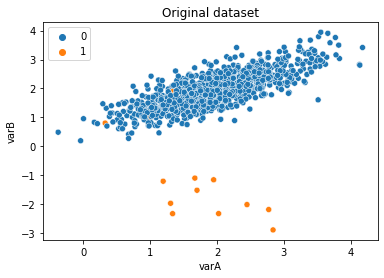

In [7]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

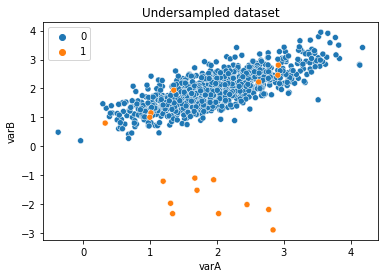

In [8]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Lưu ý các chấm vàng giờ đã nhìn rõ hơn do các quan sát lân cận của lớp đa số đã bị loại khỏi tập dữ liệu. 

ENN loại các quan sát quá giống với quan sát của lớp thiểu số khỏi lớp đa số.

### Các lớp phân tách một phần

Hãy lặp lại bài tập tương tự trong dữ liệu có các lớp không được phân tách quá rõ ràng.

In [9]:
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=0)

# thiết lập ENN transformer

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resample lớp đa số
    n_neighbors=3, # số lượng neighbour để kiểm tra
    kind_sel='all',  # tất cả các neighbour cần đồng ý
    n_jobs=4)  # có 4 core trong máy


X_resampled, y_resampled = enn.fit_resample(X, y)

In [10]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((960, 2), (960,))

Do các lớp không phân biệt rõ ràng nên có nhiều mẫu bị loại khỏi tập dữ liệu hơn.

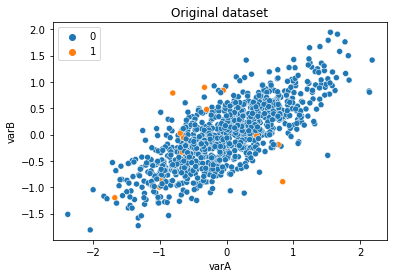

In [12]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

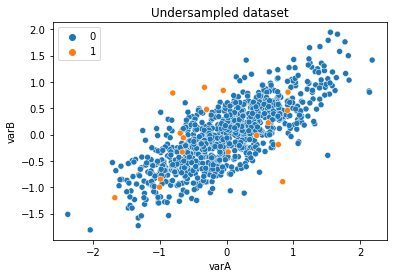

In [13]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

Lưu ý rằng các quan sát bị xóa khỏi khu vực xung quanh lớp thiểu số.

**BÀI TẬP**

- Thay đổi số lượng neighbour để kiểm tra
- Thay đổi phương thức lựa chọn từ **all** thành **mode**
- so sánh kết quả phân phối và kích thước tập dữ liệu.

Lưu ý rằng nếu chúng ta truyền một số nguyên vào đối số n_neighbors=3 thì 3 là số neighbour được kiểm tra, hãy nhìn vào 3 neighbour gần nhất để xác định xem giữ lại hay loại bỏ một mẫu. 

Nếu bạn muốn truyền vào một lớp KNN từ Scikit-learn, như [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) thay vì một số nguyên, hãy nhớ rằng để kiểm tra 3 neighbour, chúng ta cần huấn luyện 4 KNN vì quan sát sẽ chính là 1 trong số các neighbour.

In [14]:
# load dữ liệu
# chỉ một vài quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000, random_state=10)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
76689,36.51,31.00,0.22,-50.5,28.5,1775.5,0.74,1.66,-11.5,-87.5,...,1478.4,0.19,4.55,5.0,-127.0,1029.8,0.39,0.47,0.44,-1
61613,87.56,25.79,0.73,-24.0,6.5,2078.1,-0.61,1.00,7.5,-86.5,...,1549.9,0.30,-2.28,-17.0,-89.0,906.4,0.34,0.30,0.21,-1
14280,43.55,24.14,-2.09,-68.0,37.0,438.0,1.76,-0.02,-6.0,-55.0,...,-63.0,1.83,0.92,2.0,-46.0,182.5,-1.12,0.15,0.19,-1
61672,39.17,28.24,0.86,-13.0,-25.5,2326.5,0.94,0.04,-1.0,-81.5,...,1995.8,0.39,-4.37,-23.0,-54.0,188.8,2.80,0.55,0.47,-1
70728,88.80,22.52,0.89,5.0,-30.0,620.9,1.12,0.19,-4.0,-66.0,...,751.9,-0.22,-0.39,-4.0,-41.0,337.5,0.77,0.25,0.39,-1


In [15]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

-1    0.9913
 1    0.0087
Name: target, dtype: float64

In [16]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

In [17]:
# edited nearest neighbours
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resample lớp đa số
    n_neighbors=3, # số lượng neighbour để kiểm tra để loại một quan sát
    kind_sel='all',  # tất cả các neighbour cần đồng ý
    n_jobs=4)  # có 4 core trong máy

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [18]:
# so sánh hình dạng

X_train.shape, X_enn.shape

((7000, 74), (6954, 74))

## Vẽ biểu đồ dữ liệu

Hãy so sánh dữ liệu trông như thế nào trước và sau khi undersampling.

Text(0.5, 1.0, 'Original data')

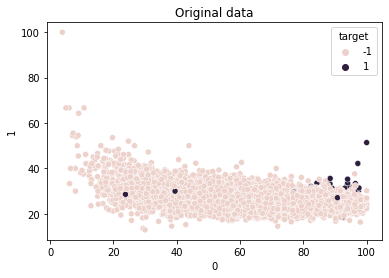

In [19]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Edited NN data')

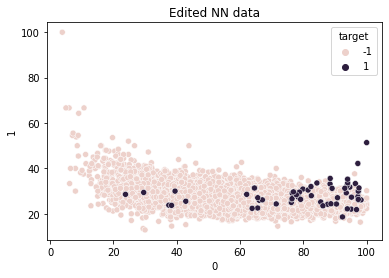

In [20]:
# dữ liệu undersampled của enn

sns.scatterplot(data=X_enn,
                x="0",
                y="1",
                hue=y_enn)

plt.title('Edited NN data')

Text(0.5, 1.0, 'Original data')

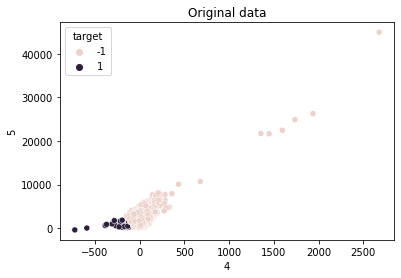

In [21]:
# dữ liệu ban đầu, tập hợp khác của biến

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

## Repeated Edited Nearest Neighbours

[RepeatedEditedNearestNeighbours](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RepeatedEditedNearestNeighbours.html)


### Các lớp được phân tách tốt

Text(0.5, 1.0, 'Edited NN data')

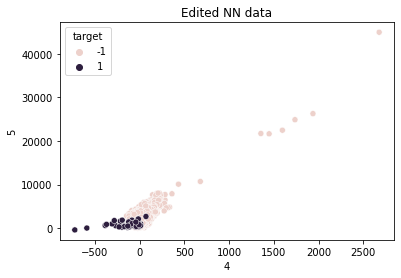

In [22]:
# dữ liệu undersampled của enn 

sns.scatterplot(data=X_enn,
                x="4",
                y="5",
                hue=y_enn)

plt.title('Edited NN data')

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [23]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    ## Yêu cầu 6:
    ## VIẾT CODE Ở ĐÂY:
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

<details><summary> Gợi ý </summary>

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

</details>

In [24]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9946325648414985
Test set
Random Forests roc-auc: 0.983555705049146


In [25]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled 

run_randomForests(X_enn,
                  X_test,
                  y_enn,
                  y_test)

Train set
Random Forests roc-auc: 0.9918528188763176
Test set
Random Forests roc-auc: 0.9811762654009543


Chất lượng có vẻ giảm đi khi dùng phương pháp này.

**BÀI TẬP**

- Thay đổi số lượng neighbour và phương thức lựa chọn từ all thành mode, so sánh chất lượng mô hình và phân phối của quan sát.

# Repeated Edited Nearest Neighbours

Mở rộng ENN, lặp đi lặp lại quy trình cho tới khi không còn quan sát nào bị loại khỏi tập dữ liệu hoặc cho đến khi đạt số lượng lặp lại tối đa.

Tóm tắt:

1) Huấn luyện thuật toán KNN trên toàn bộ tập dữ liệu và tìm 3 neighbour gần nhất (người dùng quyết định số lượng neighbour để kiểm tra)

2) Kiểm tra toàn bộ quan sát của lớp đa số và loại các quan sát nếu lớp của nó khác với lớp của các neighbour

3) Lặp lại bước 1 và 2 với dữ liệu còn lại

Quy trình này luôn xem xét cùng một số lượng neighbour

In [26]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

In [27]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập repeated edited nearest neighbour

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',# chỉ loại các quan sát của lớp đa số
    n_neighbors=3, # số lượng neighbour để kiểm tra
    kind_sel='all', # toàn bộ quan sát lân cận nên ở cùng lóp
    n_jobs=4, # 4 bộ xử lý trong máy
    max_iter=100) # số lần lặp tối đa

X_resampled, y_resampled = renn.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[RepeatedEditedNearestNeighbours()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RepeatedEditedNearestNeighbours.html)

</details>

In [28]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [29]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((967, 2), (967,))

So sánh kết quả này với kết quả của notebook trước và xem cách RENN loại nhiều mẫu hơn so với ENN, điều được kỳ vọng.

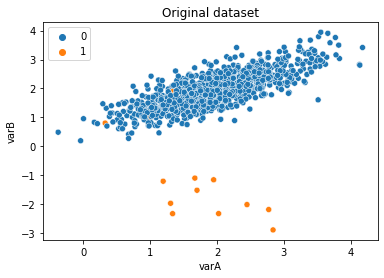

In [30]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

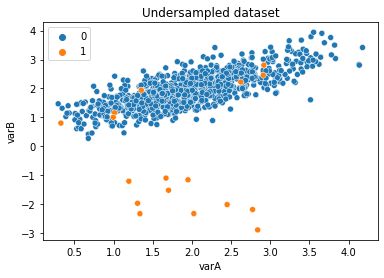

In [31]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Lưu ý các chấm vàng giờ đã nhìn rõ hơn do các quan sát lân cận của lớp đa số đã bị loại khỏi tập dữ liệu.

In [32]:
# số lần lặp thực tế
# được chạy, nếu nhỏ hơn max_iter, có nghĩa là
# quy trình dừng sớm.

renn.n_iter_

4

Chúng ta thấy chỉ có 4 lần lặp được chạy.

In [33]:
# hãy kiểm tra mục tiêu lấy lại mẫu

y_resampled.value_counts()

0    950
1     17
dtype: int64


**BÀI TẬP**

- thay đổi số neighbour
- so sánh phân phối và kích thước dữ liệu cuối cùng, và số lần lặp thực tế được chạy

### Các lớp phân tách một phần

Hãy lặp lại bài tập tương tự trong dữ liệu có các lớp không được phân tách quá rõ ràng.

In [34]:
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=0)

# thiết lập repeated edited nearest neighbour transformer

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3, # số lượng neighbour để kiểm tra
    kind_sel='all',
    n_jobs=4,
    max_iter=100) # số lần lặp tối đa

X_resampled, y_resampled = renn.fit_resample(X, y)

In [35]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [36]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((940, 2), (940,))

Do các lớp không phân biệt rõ ràng nên có nhiều mẫu bị loại khỏi tập dữ liệu hơn.

So sánh kết quả của RENN với kết quả của ENN trong notebook trước và thấy rằng RENN loại nhiều mẫu khỏi tập dữ liệu gốc hơn.

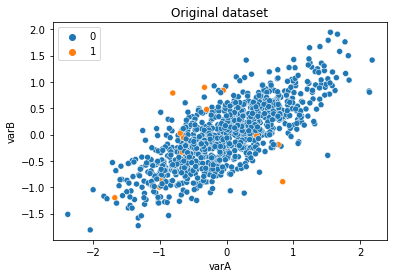

In [37]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

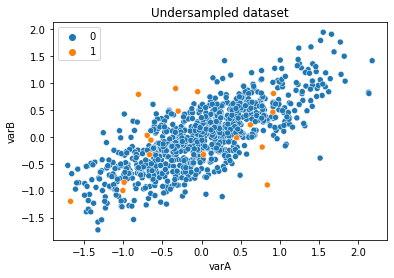

In [38]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

Lưu ý rằng các quan sát bị xóa khỏi khu vực xung quanh lớp thiểu số.

## Repeated Edited Nearest Neighbours


### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [39]:
# load dữ liệu
# chỉ một vài quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000, random_state=10)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
76689,36.51,31.00,0.22,-50.5,28.5,1775.5,0.74,1.66,-11.5,-87.5,...,1478.4,0.19,4.55,5.0,-127.0,1029.8,0.39,0.47,0.44,-1
61613,87.56,25.79,0.73,-24.0,6.5,2078.1,-0.61,1.00,7.5,-86.5,...,1549.9,0.30,-2.28,-17.0,-89.0,906.4,0.34,0.30,0.21,-1
14280,43.55,24.14,-2.09,-68.0,37.0,438.0,1.76,-0.02,-6.0,-55.0,...,-63.0,1.83,0.92,2.0,-46.0,182.5,-1.12,0.15,0.19,-1
61672,39.17,28.24,0.86,-13.0,-25.5,2326.5,0.94,0.04,-1.0,-81.5,...,1995.8,0.39,-4.37,-23.0,-54.0,188.8,2.80,0.55,0.47,-1
70728,88.80,22.52,0.89,5.0,-30.0,620.9,1.12,0.19,-4.0,-66.0,...,751.9,-0.22,-0.39,-4.0,-41.0,337.5,0.77,0.25,0.39,-1


In [40]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

-1    0.9913
 1    0.0087
Name: target, dtype: float64

In [41]:
# tách thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

In [42]:
# repeated NN
## Yêu cầu 9:
## VIẾT CODE Ở ĐÂY:
renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3, # số lượng neighbour để kiểm tra
    kind_sel='all',
    n_jobs=4,
    max_iter=100)  # số lần lặp tối đa

X_renn, y_renn = renn.fit_resample(X_train, y_train)

In [43]:
# so sánh hình dạng

X_train.shape, X_renn.shape

((7000, 74), (6950, 74))

In [44]:
# số lần lặp thực tế 
# được chạy, nếu nhỏ hơn max_iter, nghĩa là
# quy trình dừng sớm hơn
## Yêu cầu 10:
## VIẾT CODE Ở ĐÂY:
renn.n_iter_

3

<details><summary> Gợi ý </summary>

Sử dụng ```n_iter_```

</details>

## Vẽ biểu đồ dữ liệu

Hãy so sánh dữ liệu trông như thế nào trước và sau khi undersampling.

Text(0.5, 1.0, 'Original data')

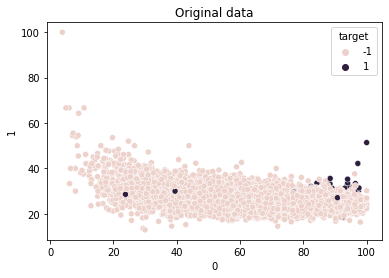

In [45]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Repeated Edited NN data')

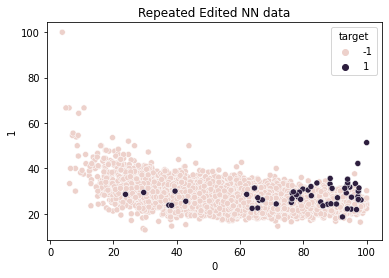

In [46]:
# dữ liệu undersampled của renn 

sns.scatterplot(data=X_renn,
                x="0",
                y="1",
                hue=y_renn)

plt.title('Repeated Edited NN data')

Text(0.5, 1.0, 'Original data')

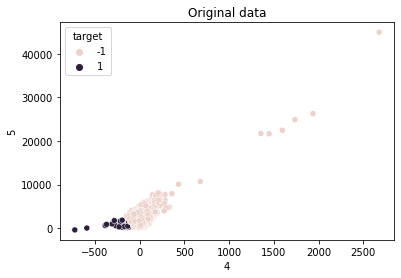

In [47]:
# dữ liệu ban đầu, tập hợp khác của biến

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Repeated Edited NN data')

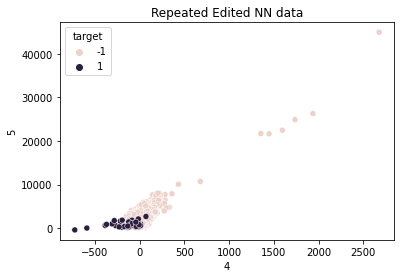

In [48]:
# dữ liệu undersampled của renn

sns.scatterplot(data=X_renn,
                x="4",
                y="5",
                hue=y_renn)

plt.title('Repeated Edited NN data')

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [49]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [50]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng
## Yêu cầu 11:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9946325648414985
Test set
Random Forests roc-auc: 0.983555705049146


In [51]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled của renn
## Yêu cầu 12:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_renn,
                  X_test,
                  y_renn,
                  y_test)

Train set
Random Forests roc-auc: 0.992089985486212
Test set
Random Forests roc-auc: 0.9858105667052859


Có vẻ chất lượng có cải thiện một chút.

**BÀI TẬP**

- Thay đổi số lượng neighbour. So sánh kích thước dữ liệu, phân phối của quan sát và chất lượng mô hình. Cũng thay đổi phương thức lựa chọn từ all thành mode và đánh giá các khía cạnh tương tự.

# All KNN

- Điều chỉnh chức năng của ENN, ỏ từng vòng, nó tăng số lượng neighbour được dùng để loại trừ hoặc giữ quan sát lại
- Bắt đầu bằng cách xem xét 1 neighbour gần nhất
- Kết thúc khi đạt số lượng neighbour kiểm tra tối đa, do người dùng xác định
- dừng sớm nếu lớp đa số trở thành lớp thiểu số


AllKNN là sự lặp lại của ENN, bắt đầu bằng cách kiểm tra 1 neighbour gần nhất và tăng 1 neighbour ở mỗi vòng.

Việc lặp sẽ ngừng sau khi kiểm tra số lượng tối đa các neighbour mà người dùng đã nhập hoặc khi lớp tối đa biến mất hoặc trở thành lớp tối thiểu, bất cứ điều gì xảy ra trước.

Việc thêm neighbour ở mỗi lần lặp khiến tiêu chí giữ lại mẫu ngày càng khó hơn, do đó sẽ loại nhiều quan sát gần với ranh giới lớp thiểu số hơn .

Trong notebook này, chúng ta sẽ so sánh ENN, RENN và AllKNN.

In [52]:
from imblearn.under_sampling import (
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN
)

## Undersample với AllKNN

[AllKNN](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.AllKNN.html)


### Các lớp được phân tách tốt

In [53]:
## Yêu cầu 13:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập AllKNN

# như thiết lập dưới đây, nó sẽ bắt đầu bằng cách kiểm tra
# 1 neighbour gần nhất và kết thúc khi kiểm tra 5
# neighbour gần nhất

allknn = AllKNN(
    sampling_strategy='auto',  # chỉ undersample lớp đa số
    n_neighbors=5, # kích thước neighbour tối đa để kiểm tra 
    kind_sel='all',  # tất cả các neighbour cần phải có cùng nhãn với quan sát được kiểm tra
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = allknn.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[AllKNN()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.AllKNN.html)

</details>

In [54]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [55]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((954, 2), (954,))

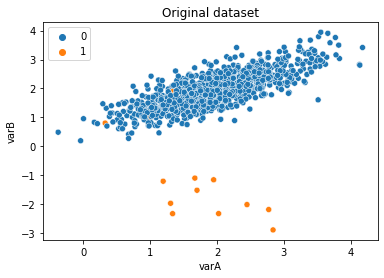

In [56]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

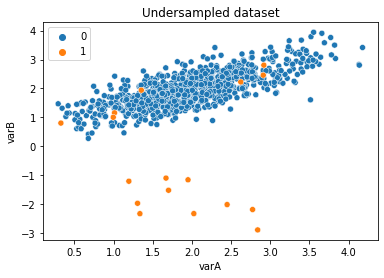

In [57]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Lưu ý các chấm vàng giờ đã nhìn rõ hơn do các quan sát lân cận của lớp khác đã bị loại khỏi tập dữ liệu.

### Các lớp phân tách một phần

Hãy lặp lại bài tập tương tự trong dữ liệu có các lớp không được phân tách quá rõ ràng.

In [58]:
## Yêu cầu 14:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=0)

# thiết lập AllKNN

# như thiết lập dưới đây, nó sẽ bắt đầu bằng cách kiểm tra
# 1 neighbour gần nhất và kết thúc khi kiểm tra 5
# neighbour gần nhất

allknn = AllKNN(
    sampling_strategy='auto',  # resample lớp đa số
    n_neighbors=3, # kích thước neighbour tối đa để kiểm tra
    kind_sel='all',  # tất cả các neighbour cần đồng ý
    n_jobs=4)  # có 4 core trong máy


X_resampled, y_resampled = allknn.fit_resample(X, y)

In [59]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [60]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((947, 2), (947,))

Do các lớp không phân biệt rõ ràng nên có nhiều mẫu bị loại khỏi tập dữ liệu hơn.

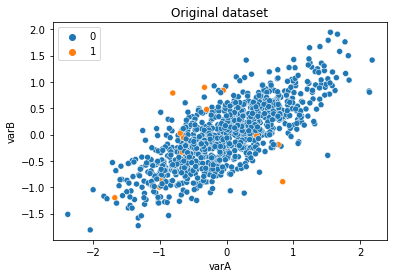

In [61]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

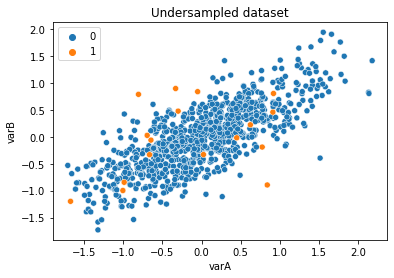

In [62]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

Lưu ý rằng các quan sát bị xóa khỏi khu vực xung quanh lớp thiểu số.

Các lớp càng gần thì càng có nhiều quan sát bị loại hơn.

## All KNN


### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [63]:
# load dữ liệu
# chỉ một vài quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000, random_state=10)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
76689,36.51,31.00,0.22,-50.5,28.5,1775.5,0.74,1.66,-11.5,-87.5,...,1478.4,0.19,4.55,5.0,-127.0,1029.8,0.39,0.47,0.44,-1
61613,87.56,25.79,0.73,-24.0,6.5,2078.1,-0.61,1.00,7.5,-86.5,...,1549.9,0.30,-2.28,-17.0,-89.0,906.4,0.34,0.30,0.21,-1
14280,43.55,24.14,-2.09,-68.0,37.0,438.0,1.76,-0.02,-6.0,-55.0,...,-63.0,1.83,0.92,2.0,-46.0,182.5,-1.12,0.15,0.19,-1
61672,39.17,28.24,0.86,-13.0,-25.5,2326.5,0.94,0.04,-1.0,-81.5,...,1995.8,0.39,-4.37,-23.0,-54.0,188.8,2.80,0.55,0.47,-1
70728,88.80,22.52,0.89,5.0,-30.0,620.9,1.12,0.19,-4.0,-66.0,...,751.9,-0.22,-0.39,-4.0,-41.0,337.5,0.77,0.25,0.39,-1


In [64]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

-1    0.9913
 1    0.0087
Name: target, dtype: float64

In [65]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 15:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

In [67]:
# edited nearest neighbours
## Yêu cầu 16:
## VIẾT CODE Ở ĐÂY:
enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resample lớp đa số
    n_neighbors=5, # số lượng neighbour cần đồng ý
    kind_sel='all',  # phần lớn neighbour cần đồng ý
    n_jobs=4)  # có 4 core trong máy

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [68]:
# repeated NN
## Yêu cầu 17:
## VIẾT CODE Ở ĐÂY:
renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=5, # số lượng neighbour cần đồng ý
    kind_sel='all',  # phần lớn neighbour cần đồng ý
    n_jobs=4,
    max_iter=100)  # có 4 core trong máy

X_renn, y_renn = renn.fit_resample(X_train, y_train)

In [69]:
# All KNN
## Yêu cầu 18:
## VIẾT CODE Ở ĐÂY:
allknn = AllKNN(
    sampling_strategy='auto',
    n_neighbors=5, # kích thước neighbour sẽ được kiểm tra
    kind_sel='all', # phần lớn neighbour cần đồng ý
    n_jobs=4,
)  

X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)

In [70]:
# so sánh hình dạng

X_train.shape, X_enn.shape, X_renn.shape, X_allknn.shape

((7000, 74), (6905, 74), (6882, 74), (6887, 74))

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [71]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [72]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng
## Yêu cầu 19:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9946325648414985
Test set
Random Forests roc-auc: 0.983555705049146


In [74]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled 
## Yêu cầu 20:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_enn,
                  X_test,
                  y_enn,
                  y_test)

Train set
Random Forests roc-auc: 0.995517409301193
Test set
Random Forests roc-auc: 0.9758817007387475


In [76]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled của renn
## Yêu cầu 21:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_renn,
                  X_test,
                  y_renn,
                  y_test)

Train set
Random Forests roc-auc: 0.991085214502101
Test set
Random Forests roc-auc: 0.9854742061267457


In [77]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled của renn
## Yêu cầu 22:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_allknn,
                  X_test,
                  y_allknn,
                  y_test)

Train set
Random Forests roc-auc: 0.9934329378448318
Test set
Random Forests roc-auc: 0.9794570891106377


Dường như không có thay đổi lớn về chất lượng trong tập dữ liệu với thuật toán này.